In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Machine Learning Python\\DATA\\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

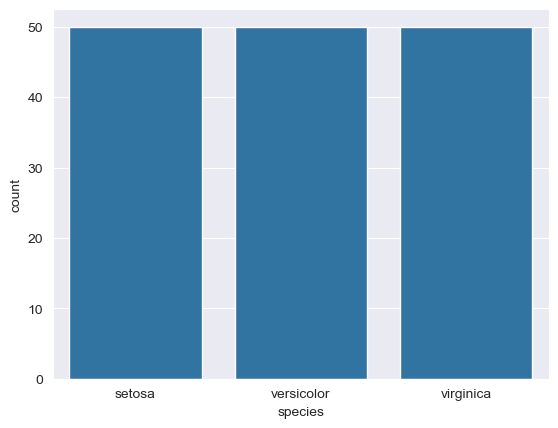

In [6]:
sns.countplot(data = df, x = 'species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

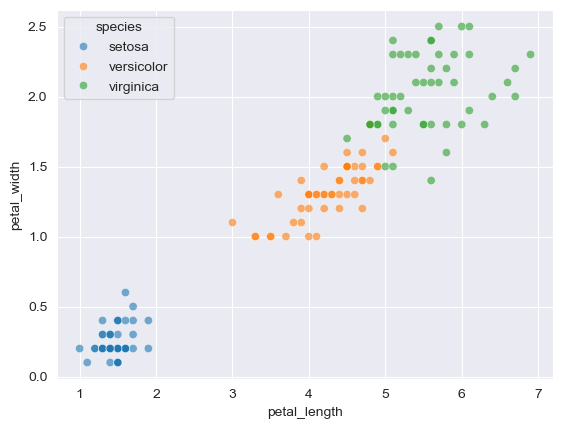

In [8]:
sns.scatterplot(x='petal_length',y='petal_width',data=df, hue = 'species', alpha = 0.6)

In [11]:
X = df.drop('species',axis=1)
y = df['species']

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(solver = 'saga', multi_class="ovr", max_iter=10000)
penalty = ['l1','l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {'penalty' : penalty,
              'l1_ratio' : l1_ratio,
              'C' : C
              }
grid_model = GridSearchCV(log_model, param_grid = param_grid)
grid_model.fit(scaled_X_train,y_train)

C:\Users\ilyak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ilyak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ilyak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ilyak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ilyak\anacond

GridSearchCV(estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [17]:
grid_model.best_params_

{'C': 127.42749857031335, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [19]:
y_pred = grid_model.predict(scaled_X_test)

accuracy_score(y_test,y_pred)

0.8947368421052632

In [20]:
confusion_matrix(y_test,y_pred)

array([[12,  1,  0],
       [ 0, 12,  3],
       [ 0,  0, 10]], dtype=int64)

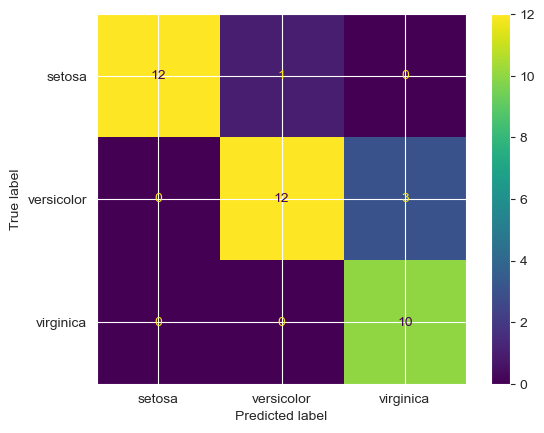

In [21]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.92      0.96        13
  versicolor       0.92      0.80      0.86        15
   virginica       0.77      1.00      0.87        10

    accuracy                           0.89        38
   macro avg       0.90      0.91      0.90        38
weighted avg       0.91      0.89      0.90        38



In [25]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # создаём пустые структуры
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # один раз вычисляем dummies 
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc для каждого класса
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

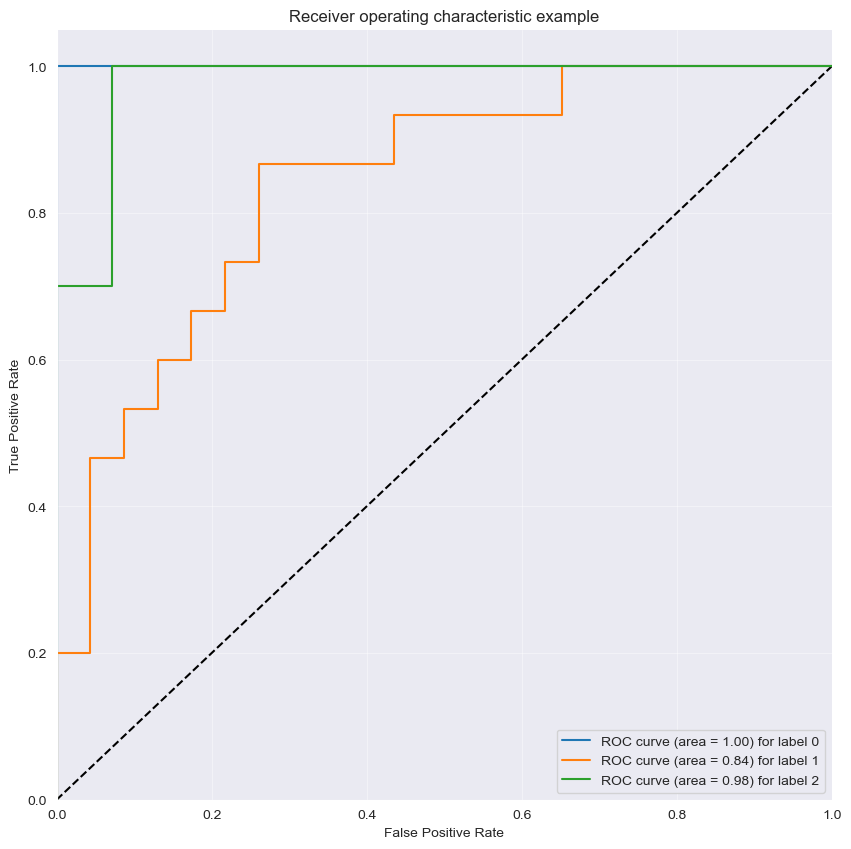

In [26]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(10, 10))